In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [15]:
x, sr = librosa.load('/Users/jrmylee/Documents/dev/projects/mir/research/decreasing.aif')
win = sr * 3
lx = len(x)
xp_len = int(np.ceil(lx/win)) * win
x.resize(xp_len)

In [25]:
x_chunks = x.reshape((len(x) // (sr * 3), (sr * 3)))

In [26]:
tempos = []
for xc in x_chunks:
    onsets = librosa.onset.onset_strength(y=xc,sr=sr)
    tempo = librosa.beat.tempo(onset_envelope=onsets, sr=sr)
    tempos.append(tempo[0])

In [27]:
print(tempos)

[129.19921875, 129.19921875, 117.45383522727273, 117.45383522727273, 99.38401442307692, 99.38401442307692, 89.10290948275862, 83.35433467741936, 78.30255681818181, 69.83741554054055, 69.83741554054055, 61.5234375]


In [11]:
sr * 3

66150

In [12]:
len(x) / (sr * 3)

12.0

In [25]:
def load_song(path_to, win_len=3):
    x, sr = librosa.load(path_to)
    win = sr * win_len
    lx = len(x)
    xp_len = int(np.ceil(lx/win)) * win
    x.resize(xp_len)
    x_chunks = x.reshape((len(x) // (sr * win_len), (sr * win_len)))
    return x_chunks

def tempo_analysis(x_chunks, sr=22050):
    tempos = []
    for i in range(len(x_chunks)):
        arrs = x_chunks[0: i + 1]
        arrs = arrs.flatten()
        onsets = librosa.onset.onset_strength(y=arrs,sr=sr)
        tempo = librosa.beat.tempo(onset_envelope=onsets, sr=sr)
        tempos.append(np.floor(tempo[0]))
    return tempos

def tempo_analysis_og(x_chunks, sr=22050):
    tempos = []
    for i in range(len(x_chunks)):
        onsets = librosa.onset.onset_strength(y=x_chunks[i],sr=sr)
        tempo = librosa.beat.tempo(onset_envelope=onsets, sr=sr)
        tempos.append(np.floor(tempo[0]))
    return tempos

In [26]:
increasing = load_song('/Users/jrmylee/Documents/dev/projects/mir/research/increasing.aif')
mapping = {
    'increasing' : increasing
}
increasing_tempo = tempo_analysis(mapping['increasing'])
increasing_tempo_og = tempo_analysis_og(increasing)

In [22]:
print(increasing_tempo)
print(upndown_tempo)

[58.0, 58.0, 78.0, 78.0, 78.0, 80.0, 78.0, 78.0, 78.0, 89.0, 89.0, 99.0, 99.0, 99.0, 99.0, 107.0, 107.0, 107.0]
[58.0, 58.0, 78.0, 78.0, 78.0, 80.0, 78.0, 78.0, 78.0, 89.0, 89.0, 99.0, 99.0, 99.0, 99.0, 107.0, 107.0, 107.0]


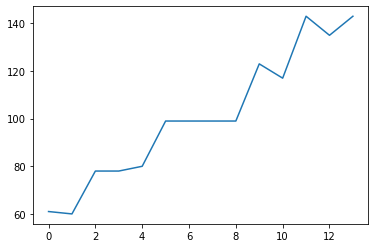

In [27]:
plt.plot(range(len(increasing_tempo_og)), increasing_tempo_og)

In [28]:
upndown = load_song('/Users/jrmylee/Documents/dev/projects/mir/research/up_down.aif')
upndown_tempo = tempo_analysis(upndown)
upndown_tempo_og = tempo_analysis_og(upndown)

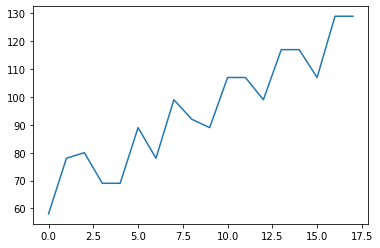

In [29]:
plt.plot(range(len(upndown_tempo_og)), upndown_tempo_og)

In [42]:
decreasing = load_song('/Users/jrmylee/Documents/dev/projects/mir/research/decreasing.aif')
decreasing_tempo = tempo_analysis(decreasing)

In [43]:
print(len(decreasing_tempo))

12


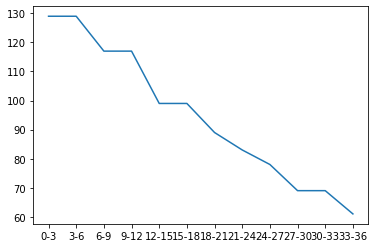

In [44]:
x_labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', '24-27', '27-30', '30-33', '33-36']
plt.plot(x_labels, decreasing_tempo)

In [47]:
print(decreasing_tempo)

[129.0, 129.0, 117.0, 117.0, 99.0, 99.0, 89.0, 83.0, 78.0, 69.0, 69.0, 61.0]


In [73]:
widmung_path = '/Users/jrmylee/Documents/dev/projects/mir/projects/vivace/api/db/widmung/trifonov.mp3'
widmung = load_song(widmung_path, win_len=20)

/Users/jrmylee/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [74]:
widmung_tempo = tempo_analysis(widmung)

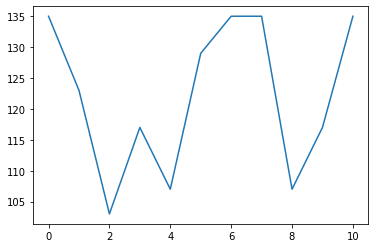

In [75]:
plt.plot(range(len(widmung_tempo)), widmung_tempo)

In [55]:
fantasie_path = '/Users/jrmylee/Documents/dev/projects/mir/projects/vivace/api/db/fantasie/fantasie.mp3'
fantasie = load_song(fantasie_path, win_len=3)

/Users/jrmylee/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [56]:
fantasie_tempo = tempo_analysis(fantasie)

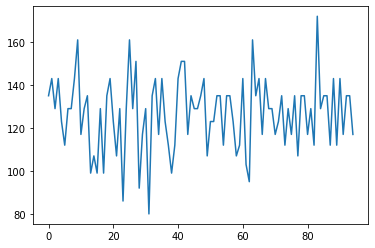

In [8]:
plt.plot(range(len(fantasie_tempo)), fantasie_tempo)

In [3]:
def ema_filter(length):
    alpha = 2/(length+1)
    h = np.ones(length)
    for i in range(length):
        h[i] = alpha * (1 - alpha) ** i
    return h / sum(h)

In [11]:
h26 = ema_filter(26)
h12 = ema_filter(12)

y26 = np.convolve(fantasie_tempo, h26, "valid")
y12 = np.convolve(fantasie_tempo, h12, "valid")
y12 = y12[14:]
MACD = y12 - y26

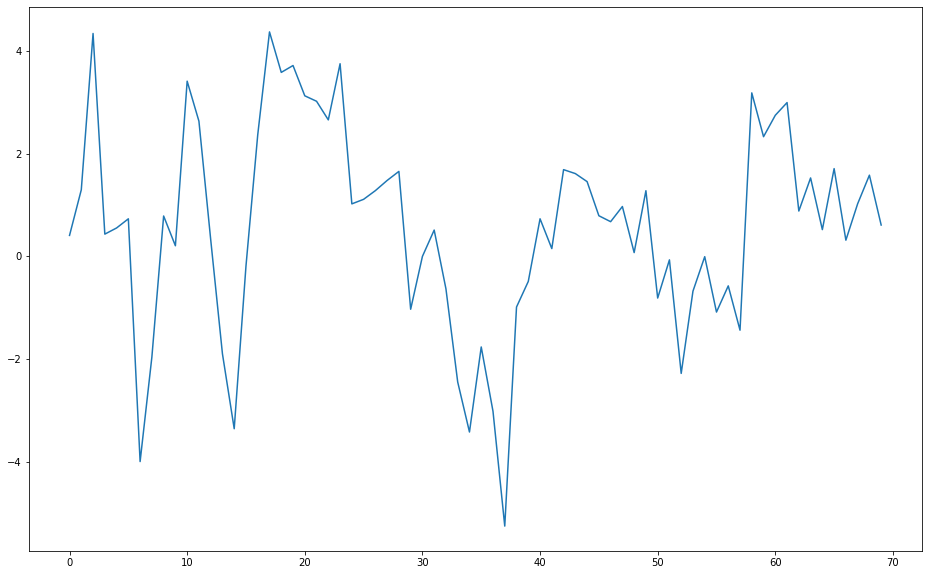

In [13]:
x = np.arange(len(MACD))
fig = plt.figure(figsize=(16, 10))
plt.plot(MACD)


In [14]:
signal = np.convolve(MACD, ema_filter(9), "same")

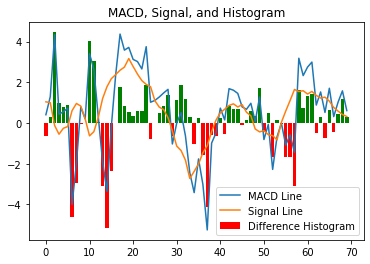

In [17]:
c = ['green', 'red']
colors = [c[bool(i)] for i in np.greater(signal, MACD)]

plt.title("MACD, Signal, and Histogram")
plt.plot(MACD, label='MACD Line')
plt.plot(signal, label='Signal Line')
plt.bar(range(len(signal)),(MACD-signal), color=colors, label="Difference Histogram")
plt.legend()
plt.show()

In [4]:
def onset_analysis(song, sr=22050):
    song = song.reshape((song.shape[0] * song.shape[1]))
    tempo, beats = librosa.beat.beat_track(y=song, sr=sr, units='samples')
    signal = np.zeros(len(song))
    for beat in beats:
        signal[beat] = 1
    return signal, beats

In [59]:
signal, beats = onset_analysis(fantasie)

In [41]:
len([i for i in signal if i != 0])

646

In [60]:
signal1 = signal[0: 500000]

In [61]:
h26 = ema_filter(26)
h12 = ema_filter(12)

y26 = np.convolve(signal1, h26, "valid")
y12 = np.convolve(signal1, h12, "valid")
y12 = y12[14:]
MACD = y12 - y26

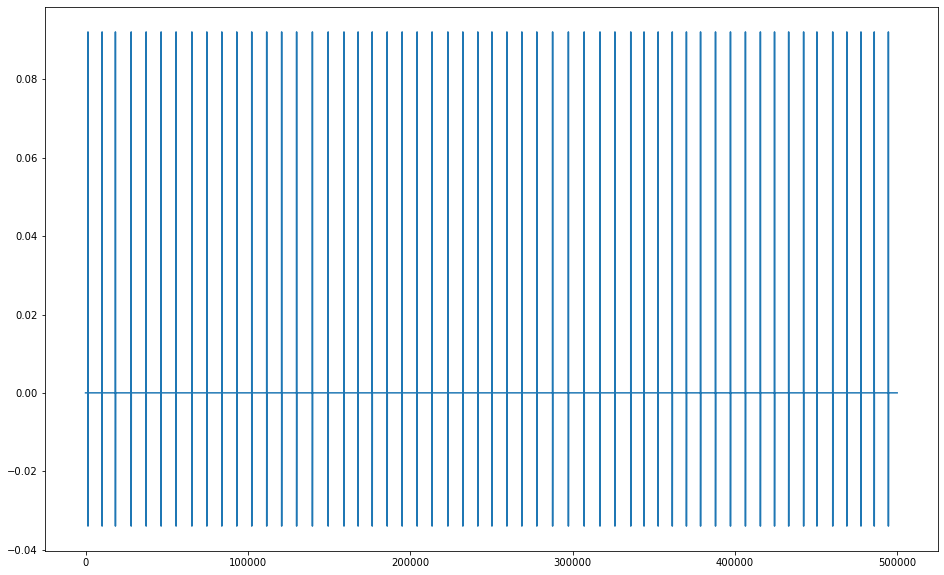

In [62]:
x = np.arange(len(MACD))
fig = plt.figure(figsize=(16, 10))
plt.plot(MACD)


In [63]:
signal2 = np.convolve(MACD, ema_filter(9), "same")

In [ ]:
c = ['green', 'red']
colors = [c[bool(i)] for i in np.greater(signal2, MACD)]

plt.title("MACD, Signal, and Histogram")
plt.plot(MACD, label='MACD Line')
plt.plot(signal2, label='Signal Line')
plt.bar(range(len(signal2)),(MACD-signal2), color=colors, label="Difference Histogram")
plt.legend()
plt.show()

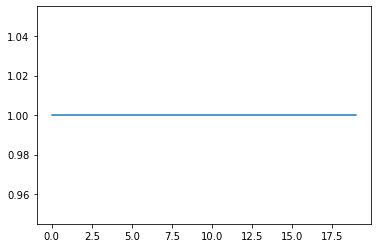

In [9]:
rect = np.ones(20)
conv1 = np.convolve(rect, rect)
conv2 = np.convolve(conv1, rect)
plt.plot(range(len(rect)), rect)

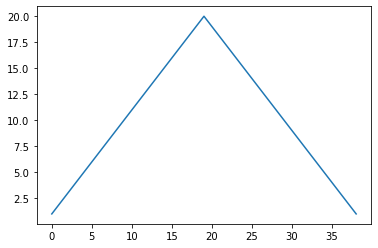

In [8]:
plt.plot(range(len(conv1)), conv1)

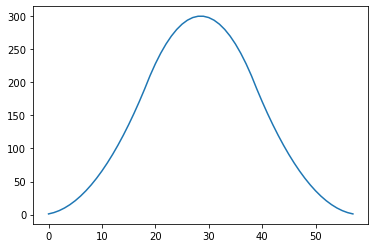

In [6]:
plt.plot(range(len(conv2)), conv2)

In [14]:
list(range(len(rect)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [62]:
# groundtruth data is in format of [start, end, time(ms), end, time, end, time, etc...]
# tempos is in the form [t1, t2, t3,...,tn], where ti is the tempo in window i
def evaluate(gt, tempos, sr=44000, win_len=3):
    start, end, time = gt[0], gt[1], gt[2] // 1000
    gt_tempos = list(np.linspace(start,end, time + 1))
    
    if len(gt) > 3:
        for i in range(3, len(gt)-1, 2):
            start, end, time = end, gt[i], gt[i+1] // 1000
            gt_tempos += list(np.linspace(start, end, time + 1))[1:]
        
    gt_signal = np.array(gt_tempos)
    print(gt_signal)
    c_tempos = []
    n = len(tempos)
    for i in range(n):
        c_tempos += [tempos[i] for j in range(win_len - 1)]
    
    signal = np.array(c_tempos)
    print(signal)
    
    error = mean_squared_error(gt_signal, signal)
    
    return error, signal, gt_signal
    
        
    
    

In [63]:
evaluate([90, 120, 1000, 80, 1000, 130, 2000, 110, 3000], [90, 100, 90, 120])

[ 90.         120.          80.         105.         130.
 123.33333333 116.66666667 110.        ]
[ 90  90 100 100  90  90 120 120]


(518.4027777777777,
 array([ 90,  90, 100, 100,  90,  90, 120, 120]),
 array([ 90.        , 120.        ,  80.        , 105.        ,
        130.        , 123.33333333, 116.66666667, 110.        ]))

In [51]:
list(np.linspace(90, 120, 2))

[90.0, 120.0]

In [41]:
arr = []
arr += list(np.linspace(120, 80, 2))

In [42]:
arr

[120.0, 80.0]